# Cross validation of time series data

In [71]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [72]:
series = read_csv('D:\\Dropbox\\szkolenia\\time_series\\sunspots.csv', header=0, 
                  parse_dates=[0], index_col=0, squeeze=True)
rng1 = pd.date_range(series.index[0], periods=len(X), freq='M')#.shift(1, freq=pd.datetools.day)
series = pd.Series(series.values, index=rng1)
print(series.head())

1700-01-31     5.0
1700-02-28    11.0
1700-03-31    16.0
1700-04-30    23.0
1700-05-31    36.0
Freq: M, dtype: float64


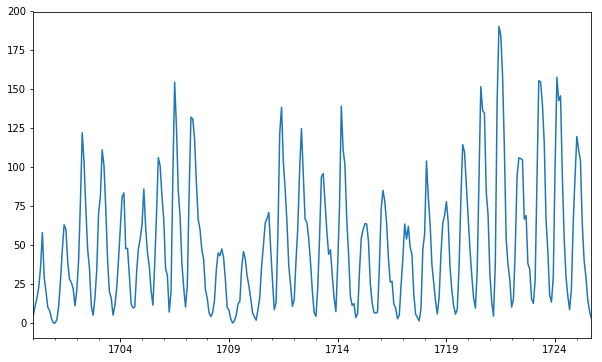

In [73]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [74]:
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 309
Training Observations: 203
Testing Observations: 106


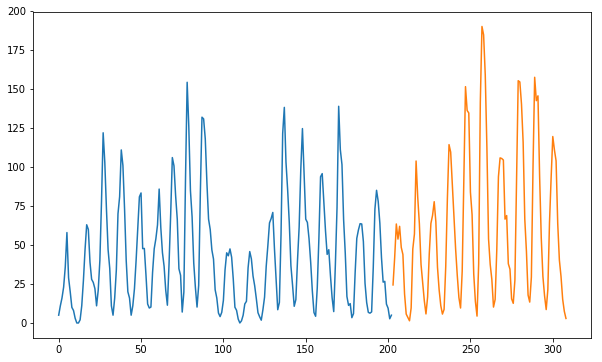

In [75]:
plt.figure(figsize=(10,6));
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.show()

- Aby dobrze nauczyć model nie możemy uczyć na tych samych danych co testujemy. 
- W tym celu dzielimy nasze dane na zbiór treningowy i testowy.
- Możemy powtórzyć proces dzielenia szeregu czasowego na zestawy pociągów i testować wielokrotnie.
- Metoda ta używa coraz to większą i większą historię w procesie uczenia. 

In [76]:
from sklearn.model_selection import TimeSeriesSplit

Observations: 155
Training Observations: 78
Testing Observations: 77


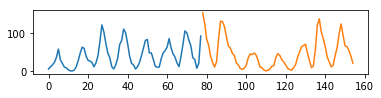

Observations: 232
Training Observations: 155
Testing Observations: 77


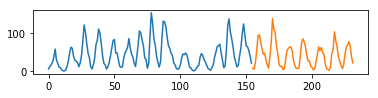

Observations: 309
Training Observations: 232
Testing Observations: 77


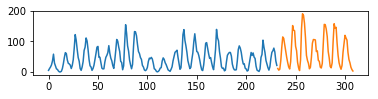

In [85]:
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    plt.show()
    index += 1


Observations: 155
Training Observations: 78
Testing Observations: 77


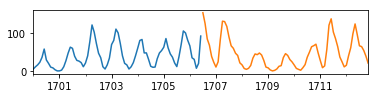

Observations: 232
Training Observations: 155
Testing Observations: 77


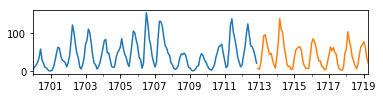

Observations: 309
Training Observations: 232
Testing Observations: 77


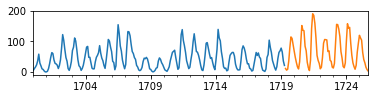

In [84]:
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    trainS= series[train_index]
    testS= series[test_index]
    plt.subplot(310 + index)
    trainS.plot()
    testS.plot()
    plt.show()
    index += 1



# Zadanie
W każdym kroku naucz model ARIMA(4,1,0) i wypisz śreni błąd.

Observations: 155
Training Observations: 78
Testing Observations: 77
Mean Squared Error: 265.384


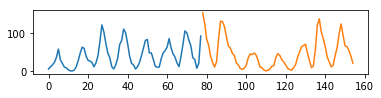

Observations: 232
Training Observations: 155
Testing Observations: 77
Mean Squared Error: 307.884


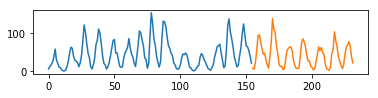

Observations: 309
Training Observations: 232
Testing Observations: 77
Mean Squared Error: 521.964


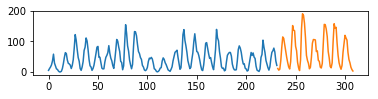

In [86]:
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(4,1,0))
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    print('Mean Squared Error: %.3f' % error)
    
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    plt.show()
    index += 1